In [1]:
import EDEDE
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Could not load cython functions. Some functionality might be broken.
Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
graphs = {}
graph_1 = {}
graph_2 = {}

graphs['1'] = graph_1
graphs['2'] = graph_2


graph_1['n_per_group'] = 60
graph_1['n_groups'] = 1
graph_1['t_start'] = 0
graph_1['t_end'] = 100
graph_1['basis_num_communities'] = 2
graph_1['powers_num_communities'] = [0]
graph_1['list_p_within_community'] = [45/50] * len(graph_1['powers_num_communities'])

graph_1['inter_tau'] = 10
graph_1['activ_tau'] = 0.05


graph_2['n_per_group'] = 30
graph_2['n_groups'] = 2
graph_2['t_start'] = 0
graph_2['t_end'] = 100
graph_2['basis_num_communities'] = 2
graph_2['powers_num_communities'] = [1]
graph_2['list_p_within_community'] = [45/50] * len(graph_2['powers_num_communities'])

graph_2['inter_tau'] = 10
graph_2['activ_tau'] = 0.05

for i in [1]:
    number_of_events, starting_times, ending_times = EDEDE.EDEDE(inter_tau =  graphs[f'{i}']['inter_tau'], activ_tau =  graphs[f'{i}']['activ_tau'],
                          t_start = graphs[f'{i}']['t_start'], t_end = graphs[f'{i}']['t_end'], seed=271)

for i in [1,2]:
    graphs[f'{i}']['net'] = EDEDE.generate_smooth_SBM(inter_tau =  graphs[f'{i}']['inter_tau'], activ_tau =  graphs[f'{i}']['activ_tau'],
                          n_per_group = graphs[f'{i}']['n_per_group'], n_groups = graphs[f'{i}']['n_groups'],
                          t_start = graphs[f'{i}']['t_start'], t_end = graphs[f'{i}']['t_end'],
                          basis_num_communities = graphs[f'{i}']['basis_num_communities'], powers_num_communities = graphs[f'{i}']['powers_num_communities'], list_p_within_community = graphs[f'{i}']['list_p_within_community'],
                          number_of_events = number_of_events, starting_times=starting_times, ending_times=ending_times, seed=271)


PID  27351  :  merged  207  events
PID  27351  :  merged  0  events
PID  27351  :  merged  304  events
PID  27351  :  merged  0  events


In [3]:
for i in [1,2]:
    graphs[f'{i}']['net']._compute_time_grid()

In [4]:
graphs['1']['net'].compute_laplacian_matrices(save_adjacencies=True, random_walk=False)
number_active_events = []

for i,t in enumerate(graphs['1']['net'].times[:-1]):
    number_active_events.append(np.sum(graphs['1']['net'].adjacencies[i].toarray()) / 2)

graphs['2']['net'].compute_laplacian_matrices(save_adjacencies=True, random_walk=False)

In [5]:
matrices_times= {'(a)':20, '(b)':50, '(c)':80}

matrices_1 = {}
for key, time in matrices_times.items():
    index_t_before = np.where(graphs['1']['net'].times <= time)[0][-1]
    matrices_1[key] = graphs['1']['net'].adjacencies[index_t_before].toarray()

matrices_2 = {}
for key, time in matrices_times.items():
    index_t_before = np.where(graphs['2']['net'].times <= time)[0][-1]
    matrices_2[key] = graphs['2']['net'].adjacencies[index_t_before].toarray()

/var/folders/39/mrj9jtrn5fb2d2f71qw3dhy80000gn/T/ipykernel_27351/17484866.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


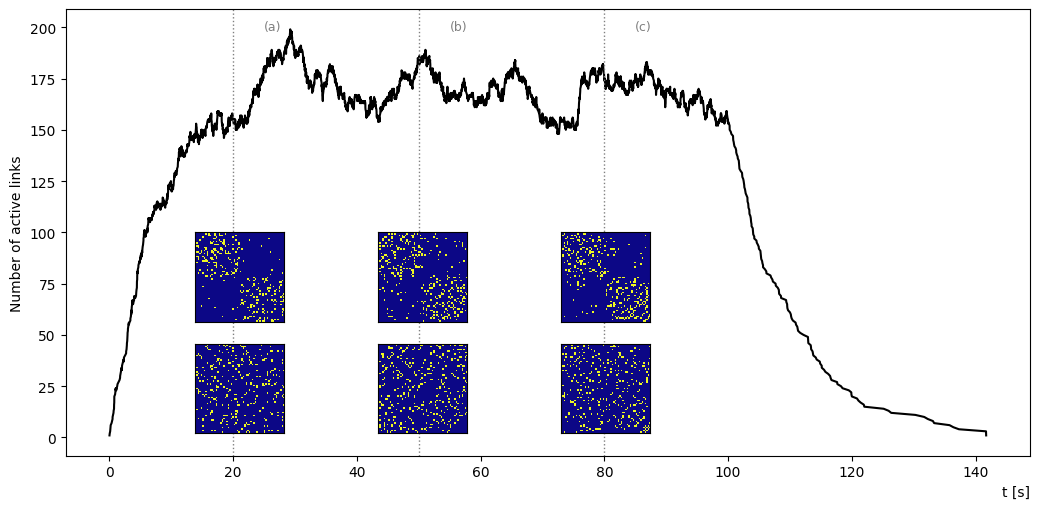

In [6]:
fig, ax = plt.subplots(figsize=(10.5, 5.2))

color = 'black'
cmap = "plasma"

ax.plot(graphs['1']['net'].times[:-1], number_active_events, color=color)

ax.set_xlabel("t [s]", loc="right")
ax.set_ylabel("Number of active links", color=color)
ax.tick_params(axis='y', labelcolor=color)


# Give some extra room at the bottom for insets and braces
fig.subplots_adjust(bottom=0.1)


# Adjacency ABOVE X-AXIS
insets = []
for key, matrix in matrices_1.items():
    insets.append(matrix)

positions = [0.08, 0.27, 0.46]


for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="20%", height="20%",
        loc="upper left",
        bbox_to_anchor=(pos, -0.75, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )
    
    inset_ax.matshow(matrix, aspect='equal', cmap=cmap)#, norm=norm)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

# Visual cues
for key, time in matrices_times.items():
    ax.axvline(time, color="gray", linestyle=":", linewidth=1.0)
    ax.text(time+ 5, ax.get_ylim()[1]*0.95, key, color="gray", fontsize=9)

# SNAPSHOT MATRICES BELOW X-AXIS

insets = []
for key, matrix in matrices_2.items():
    insets.append(matrix)

for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="20%", height="20%",
        loc="upper left",
        bbox_to_anchor=(pos, -0.5, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )

    inset_ax.matshow(matrix, aspect='equal', cmap=cmap) #,norm=norm)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

plt.tight_layout()
# plt.savefig('/Users/samuelkoovely/Desktop/fig_EDEDE/fig_EDEDE_comparison.pdf', format='pdf',bbox_inches='tight',
#     pad_inches=0.05) # small padding around
plt.show()